In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy 
import os
import seaborn as sns

In [2]:
!ls

190917_CA_data_import_viz.ipynb  me_wildlife_crossing_scraper.ipynb
ca_scrape.py			 NHTSA_data_first_look_190916.ipynb
data				 wildlifecrossing_scraper.ipynb
geckodriver.log


In [3]:
data_dir = 'data/CA_wildlife/'

In [116]:
page_num = 0
fname = '{}.json'.format(str(page_num).rjust(4,'0'))
df = pd.read_json(data_dir+'/'+fname)

for page_num in range(1,600):
    fname = '{}.json'.format(str(page_num).rjust(4,'0'))
    #print(fname)
    temp_df = pd.read_json(data_dir+'/'+fname)
    #print(temp_df.shape)
    df = df.append(temp_df)

In [117]:
df.shape

(30000, 5)

In [118]:
df['time'] = pd.to_datetime(df.time, unit='ms')

In [119]:
df.head()

,time,animal,url,latitude,longitude
61351,2019-09-16 10:43:00,California Ground Squirrel,https://www.wildlifecrossing.net/california/ob...,34.326941,-119.107519
61350,2019-09-16 10:41:00,Eastern Fox Squirrel,https://www.wildlifecrossing.net/california/ob...,34.328459,-119.104786
61337,2019-09-15 11:55:00,Mule (or Black tailed) Deer,https://www.wildlifecrossing.net/california/ob...,39.786008,-120.630033
61347,2019-09-15 09:32:00,Western Fence Lizard,https://www.wildlifecrossing.net/california/ob...,34.441982,-119.897406
61349,2019-09-15 08:38:00,Gopher Snake,https://www.wildlifecrossing.net/california/ob...,34.441827,-119.897457


In [120]:
deer_names = list()
for i in df.animal.unique():
    if 'deer' in i.lower():
        deer_names.append(i)

In [121]:
deer_names = [
    'Mule (or Black tailed) Deer',
    'Deer',
    #'Deer Mouse',
    #'Killdeer',
    'Axis Deer',
    'Sambar Deer',
    'Fallow Deer'
]

## Filtering the data
By:
- Animal
- Lat/Long

In [122]:
deer_df = df[df.animal.isin(deer_names)]
deer_df = deer_df[(deer_df.longitude<-113) & (deer_df.longitude>-124)]
deer_df = deer_df[(deer_df.latitude<42)]

In [124]:
deer_df.shape

(2682, 5)

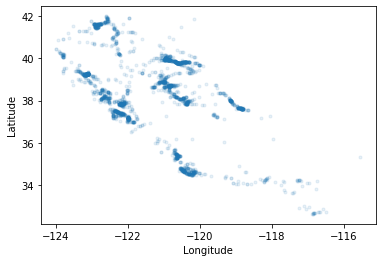

In [123]:
plt.scatter(deer_df.longitude, deer_df.latitude, marker='.', alpha=.1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
None

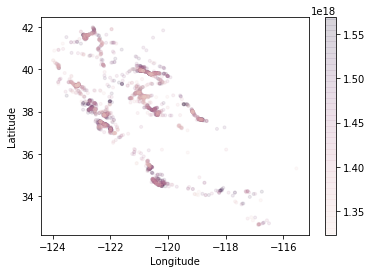

In [130]:
plt.scatter(deer_df.longitude, deer_df.latitude, c=deer_df.time, marker='.', 
            alpha=.1, cmap=cmap)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
None

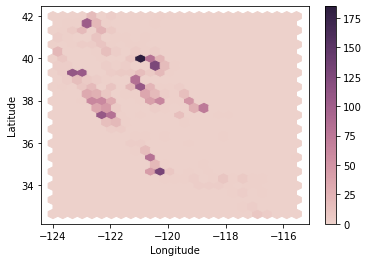

In [129]:
f, ax = plt.subplots()
points = ax.hexbin(deer_df.longitude, deer_df.latitude, gridsize=25, cmap=cmap)
f.colorbar(points)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.xlim(-122, -120)
#plt.ylim(38,43)
#plt.xticks(rotation=90)
None

# iNaturalist data

In [95]:
inat_ca_lyear = pd.read_csv('data/ca_inat_deer/last_year/observations-63748.csv')

In [105]:
inat_ca_lyear.observed_on = pd.to_datetime(inat_ca_lyear.observed_on)

In [106]:
inat_ca_lyear.columns

Index(['id', 'observed_on_string', 'observed_on', 'time_observed_at',
       'time_zone', 'out_of_range', 'user_id', 'user_login', 'created_at',
       'updated_at', 'quality_grade', 'license', 'url', 'image_url',
       'sound_url', 'tag_list', 'description', 'id_please',
       'num_identification_agreements', 'num_identification_disagreements',
       'captive_cultivated', 'oauth_application_id', 'place_guess', 'latitude',
       'longitude', 'positional_accuracy', 'geoprivacy', 'taxon_geoprivacy',
       'coordinates_obscured', 'positioning_method', 'positioning_device',
       'species_guess', 'scientific_name', 'common_name', 'iconic_taxon_name',
       'taxon_id'],
      dtype='object')

In [142]:
inat_ca_lyear.shape

(12128, 36)

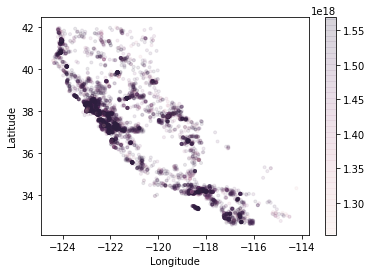

In [107]:
plt.scatter(inat_ca_lyear.longitude, inat_ca_lyear.latitude, 
            c=inat_ca_lyear.observed_on, marker='.', 
            alpha=.1, cmap=cmap)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
None

In [142]:
inat_ca_lyear.shape

(12128, 36)

In [124]:
deer_df.shape

(2682, 5)

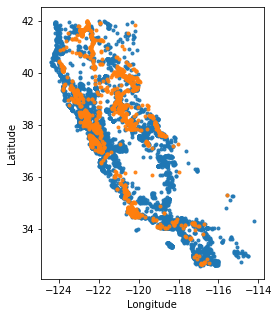

In [143]:
plt.figure(figsize=(4, 5))
plt.scatter(inat_ca_lyear.longitude, inat_ca_lyear.latitude, 
            marker='.', 
            alpha=.9, c='C0')
plt.scatter(deer_df.longitude, deer_df.latitude, c='C1', marker='.', 
            alpha=.9, cmap=cmap)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
None

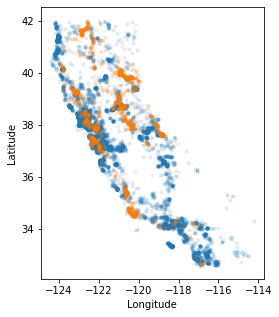

In [144]:
plt.figure(figsize=(4, 5))
plt.scatter(inat_ca_lyear.longitude, inat_ca_lyear.latitude, 
            marker='.', 
            alpha=.1, c='C0')
plt.scatter(deer_df.longitude, deer_df.latitude, c='C1', marker='.', 
            alpha=.1, cmap=cmap)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
None

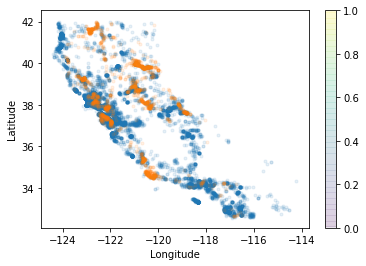

In [115]:
plt.scatter(inat_ca_lyear.longitude, inat_ca_lyear.latitude, 
            marker='.', 
            alpha=.1, c='C0')
plt.scatter(deer_df.longitude, deer_df.latitude, c='C1', marker='.', 
            alpha=.1, cmap=cmap)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar()
None

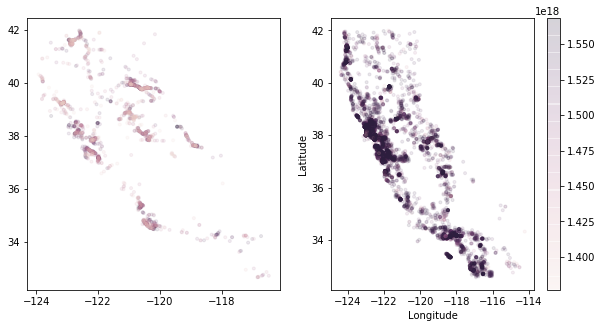

In [111]:
f, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))
points = ax.scatter(deer_df.longitude, deer_df.latitude, c=deer_df.time, marker='.', 
            alpha=.1, cmap=cmap)
f.colorbar(points)
ax2.scatter(inat_ca_lyear.longitude, inat_ca_lyear.latitude, 
            c=inat_ca_lyear.observed_on, marker='.', 
            alpha=.1, cmap=cmap)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
None